In [1]:
from data import make_point_clouds
n_samples_per_class = 10
point_clouds, labels = make_point_clouds(n_samples_per_class, 10, 0.1)
point_clouds.shape
print(f"There are {point_clouds.shape[0]} point clouds in {point_clouds.shape[2]} dimensions, "
      f"each with {point_clouds.shape[1]} points.")

There are 30 point clouds in 3 dimensions, each with 100 points.


In [2]:
from gtda.homology import VietorisRipsPersistence

VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Parameter explained in the text
diagrams = VR.fit_transform(point_clouds)
diagrams.shape

(30, 170, 3)

In [73]:
# Build the simplicial complex with a tetrahedon, an edge and an isolated vertex

rc = gudhi.RipsComplex(points=points, max_edge_length=0.5)
cplx = rc.create_simplex_tree(max_dimension=2)
# List of triangles (point indices)
triangles = np.array([s[0] for s in cplx.get_skeleton(2) if len(s[0])==3])
# List of edges (point coordinates)
edges = []
for s in cplx.get_skeleton(1):
    e = s[0]
    if len(e) == 2:
        edges.append(points[[e[0],e[1]]])

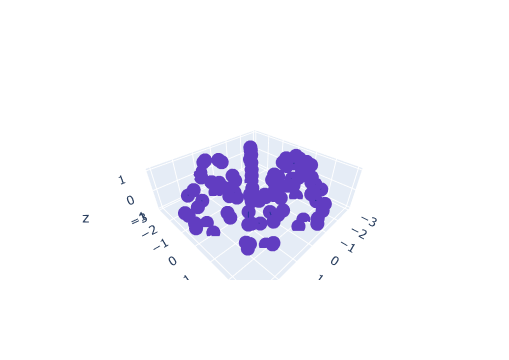

In [74]:
## With plotly
import plotly.graph_objects as go
# Plot triangles
f2 = go.Mesh3d(
        x=points[:,0],
        y=points[:,1],
        z=points[:,2],
        i = triangles[:,0] if len(triangles) else [],
        j = triangles[:,1] if len(triangles) else [],
        k = triangles[:,2] if len(triangles) else [],
        color='#ddfff7'
    )
# Plot points
f0 = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode="markers",marker=dict(color='#613dc1'))
data = [f2, f0]
# Plot edges
for pts in edges:
    seg = go.Scatter3d(x=pts[:,0],y=pts[:,1],z=pts[:,2],mode="lines",line=dict(color='#29339b'))
    data.append(seg)
fig = go.Figure(data=data,
    layout=dict(
        showlegend=False,
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'),
    )
# By default plotly would give each edge its own color and legend, that's too much
fig.show()

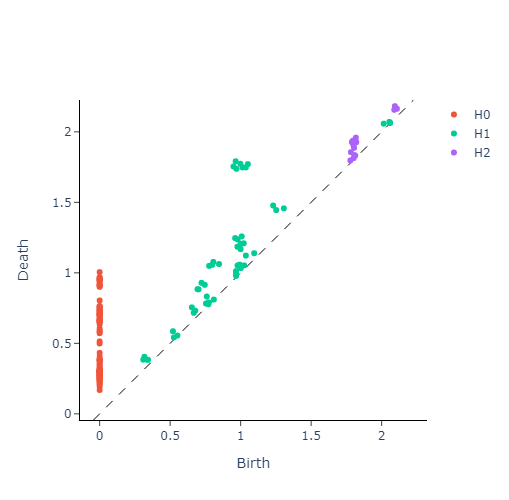

In [68]:
from gtda.plotting import plot_diagram

VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])# Parameter explained in the text
print
diagrams = VR.fit_transform(point_clouds)
plot_diagram(diagrams[i]).update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')